In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [6]:
data = pd.read_csv('inputs/USDJPY_M15.csv', sep='\t', names=('date', 'time', 'open', 'high', 'low', 'close'), usecols=[0, 1, 2, 3, 4, 5], skiprows=1)
data['datetime'] = pd.to_datetime(data['date']  + ' ' + data['time'])
data.drop(['date', 'time'], axis=1, inplace=True)
data

,open,high,low,close,datetime
0,107.547,107.567,107.455,107.518,2020-04-01 00:00:00
1,107.520,107.545,107.469,107.540,2020-04-01 00:15:00
2,107.540,107.544,107.476,107.492,2020-04-01 00:30:00
3,107.492,107.519,107.465,107.481,2020-04-01 00:45:00
4,107.481,107.549,107.481,107.547,2020-04-01 01:00:00
...,...,...,...,...,...
26951,109.330,109.334,109.307,109.318,2021-05-03 01:30:00
26952,109.318,109.319,109.302,109.315,2021-05-03 01:45:00
26953,109.315,109.324,109.306,109.307,2021-05-03 02:00:00
26954,109.307,109.307,109.291,109.291,2021-05-03 02:15:00


In [7]:
# all_data = pd.merge(data, ni225, on='datetime', suffixes=['', '_ni225']).drop(['date_ni225', 'time_ni225'], axis=1)
all_data = data.copy()
all_data

,open,high,low,close,datetime
0,107.547,107.567,107.455,107.518,2020-04-01 00:00:00
1,107.520,107.545,107.469,107.540,2020-04-01 00:15:00
2,107.540,107.544,107.476,107.492,2020-04-01 00:30:00
3,107.492,107.519,107.465,107.481,2020-04-01 00:45:00
4,107.481,107.549,107.481,107.547,2020-04-01 01:00:00
...,...,...,...,...,...
26951,109.330,109.334,109.307,109.318,2021-05-03 01:30:00
26952,109.318,109.319,109.302,109.315,2021-05-03 01:45:00
26953,109.315,109.324,109.306,109.307,2021-05-03 02:00:00
26954,109.307,109.307,109.291,109.291,2021-05-03 02:15:00


In [8]:
# extract features from date
all_data['day'] = [i.day for i in all_data['datetime']]
all_data['month'] = [i.month for i in all_data['datetime']]
all_data['year'] = [i.year for i in all_data['datetime']]
all_data['day_of_week'] = [i.dayofweek for i in all_data['datetime']]
all_data['day_of_year'] = [i.dayofyear for i in all_data['datetime']]

all_data['hour'] = [i.hour for i in all_data['datetime']]
all_data['minute'] = [i.minute for i in all_data['datetime']]

all_data

,open,high,low,close,datetime,day,month,year,day_of_week,day_of_year,hour,minute
0,107.547,107.567,107.455,107.518,2020-04-01 00:00:00,1,4,2020,2,92,0,0
1,107.520,107.545,107.469,107.540,2020-04-01 00:15:00,1,4,2020,2,92,0,15
2,107.540,107.544,107.476,107.492,2020-04-01 00:30:00,1,4,2020,2,92,0,30
3,107.492,107.519,107.465,107.481,2020-04-01 00:45:00,1,4,2020,2,92,0,45
4,107.481,107.549,107.481,107.547,2020-04-01 01:00:00,1,4,2020,2,92,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
26951,109.330,109.334,109.307,109.318,2021-05-03 01:30:00,3,5,2021,0,123,1,30
26952,109.318,109.319,109.302,109.315,2021-05-03 01:45:00,3,5,2021,0,123,1,45
26953,109.315,109.324,109.306,109.307,2021-05-03 02:00:00,3,5,2021,0,123,2,0
26954,109.307,109.307,109.291,109.291,2021-05-03 02:15:00,3,5,2021,0,123,2,15


In [9]:
# dataset = all_data[['open', 'high', 'low', 'close', 'tickvol', 'day', 'month', 'year', 'day_of_week', 'day_of_year', 'hour', 'minute', 'open_ni225', 'high_ni225', 'low_ni225', 'close_ni225', 'tickvol_ni225']]
dataset = all_data[['open', 'high', 'low', 'close', 'day', 'month', 'year', 'day_of_week', 'day_of_year', 'hour', 'minute']]
dataset


,open,high,low,close,day,month,year,day_of_week,day_of_year,hour,minute
0,107.547,107.567,107.455,107.518,1,4,2020,2,92,0,0
1,107.520,107.545,107.469,107.540,1,4,2020,2,92,0,15
2,107.540,107.544,107.476,107.492,1,4,2020,2,92,0,30
3,107.492,107.519,107.465,107.481,1,4,2020,2,92,0,45
4,107.481,107.549,107.481,107.547,1,4,2020,2,92,1,0
...,...,...,...,...,...,...,...,...,...,...,...
26951,109.330,109.334,109.307,109.318,3,5,2021,0,123,1,30
26952,109.318,109.319,109.302,109.315,3,5,2021,0,123,1,45
26953,109.315,109.324,109.306,109.307,3,5,2021,0,123,2,0
26954,109.307,109.307,109.291,109.291,3,5,2021,0,123,2,15


In [10]:
dataset['y'] = dataset['high'].shift(-1)
dataset[['y', 'high']]

,y,high
0,107.545,107.567
1,107.544,107.545
2,107.519,107.544
3,107.549,107.519
4,107.549,107.549
...,...,...
26951,109.319,109.334
26952,109.324,109.319
26953,109.307,109.324
26954,109.292,109.307


In [11]:
for i in range(1, 13):
    dataset['shift%s'%i] = dataset['open'].shift(i)

dataset['sma5'] = dataset['open'].rolling(5).mean()
dataset['sma15'] = dataset['open'].rolling(15).mean()
# dataset['sma50'] = dataset['open'].rolling(50).mean()
# dataset['sma100'] = dataset['open'].rolling(100).mean()
dataset

,open,high,low,close,day,month,year,day_of_week,day_of_year,hour,...,shift5,shift6,shift7,shift8,shift9,shift10,shift11,shift12,sma5,sma15
0,107.547,107.567,107.455,107.518,1,4,2020,2,92,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,107.520,107.545,107.469,107.540,1,4,2020,2,92,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,107.540,107.544,107.476,107.492,1,4,2020,2,92,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,107.492,107.519,107.465,107.481,1,4,2020,2,92,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,107.481,107.549,107.481,107.547,1,4,2020,2,92,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.5160,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26951,109.330,109.334,109.307,109.318,3,5,2021,0,123,1,...,109.261,109.261,109.321,109.311,109.302,109.286,109.315,109.321,109.2994,109.299400
26952,109.318,109.319,109.302,109.315,3,5,2021,0,123,1,...,109.294,109.261,109.261,109.321,109.311,109.302,109.286,109.315,109.3042,109.300533
26953,109.315,109.324,109.306,109.307,3,5,2021,0,123,2,...,109.277,109.294,109.261,109.261,109.321,109.311,109.302,109.286,109.3118,109.300533
26954,109.307,109.307,109.291,109.291,3,5,2021,0,123,2,...,109.262,109.277,109.294,109.261,109.261,109.321,109.311,109.302,109.3208,109.299600


In [12]:
dataset = dataset[100:-1]
dataset

,open,high,low,close,day,month,year,day_of_week,day_of_year,hour,...,shift5,shift6,shift7,shift8,shift9,shift10,shift11,shift12,sma5,sma15
100,107.104,107.168,107.071,107.146,2,4,2020,3,93,1,...,107.167,107.132,107.057,107.130,106.960,107.050,107.094,107.229,107.0960,107.112667
101,107.145,107.199,107.117,107.122,2,4,2020,3,93,1,...,107.150,107.167,107.132,107.057,107.130,106.960,107.050,107.094,107.0950,107.105733
102,107.122,107.154,107.074,107.150,2,4,2020,3,93,1,...,107.131,107.150,107.167,107.132,107.057,107.130,106.960,107.050,107.0932,107.104400
103,107.149,107.227,107.148,107.200,2,4,2020,3,93,1,...,107.041,107.131,107.150,107.167,107.132,107.057,107.130,106.960,107.1148,107.099067
104,107.200,107.258,107.185,107.215,2,4,2020,3,93,2,...,107.054,107.041,107.131,107.150,107.167,107.132,107.057,107.130,107.1440,107.106133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26950,109.334,109.340,109.322,109.331,3,5,2021,0,123,1,...,109.261,109.321,109.311,109.302,109.286,109.315,109.321,109.315,109.2856,109.295933
26951,109.330,109.334,109.307,109.318,3,5,2021,0,123,1,...,109.261,109.261,109.321,109.311,109.302,109.286,109.315,109.321,109.2994,109.299400
26952,109.318,109.319,109.302,109.315,3,5,2021,0,123,1,...,109.294,109.261,109.261,109.321,109.311,109.302,109.286,109.315,109.3042,109.300533
26953,109.315,109.324,109.306,109.307,3,5,2021,0,123,2,...,109.277,109.294,109.261,109.261,109.321,109.311,109.302,109.286,109.3118,109.300533


In [13]:
dataset[['y', 'high']]

,y,high
100,107.199,107.168
101,107.154,107.199
102,107.227,107.154
103,107.258,107.227
104,107.278,107.258
...,...,...
26950,109.334,109.340
26951,109.319,109.334
26952,109.324,109.319
26953,109.307,109.324


In [14]:
dataset.isnull().any()

open           False
high           False
low            False
close          False
day            False
month          False
year           False
day_of_week    False
day_of_year    False
hour           False
minute         False
y              False
shift1         False
shift2         False
shift3         False
shift4         False
shift5         False
shift6         False
shift7         False
shift8         False
shift9         False
shift10        False
shift11        False
shift12        False
sma5           False
sma15          False
dtype: bool

In [15]:
X = dataset.drop(['y'], axis=1)
y = dataset['y']

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

In [14]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

folds = KFold(n_splits = 5, shuffle = False)

# params = {'max_depth': [5, 7, 9, 11], 'random_state': [0], 'n_estimators': list(range(50, 200, 50)), 'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [100, 500]}
# params = {'max_depth': list(range(2, 10)), 'random_state': [0], 'n_estimators': list(range(50, 200, 50)), 'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [100, 500]}
# params = {'max_depth': list(range(2, 10)), 'random_state': [0], 'n_estimators': list(range(50, 200, 50))}
# params = {'max_depth': [5, 6, 7], 'random_state': [0], 'n_estimators': [500], 'learning_rate': [.03, .05, .07], 'min_child_weight': [4]}
params = {'max_depth': list(range(2, 10)), 'random_state': [0], 'n_estimators': list(range(50, 200, 50))}

# XGBoost
xgb = XGBRegressor()

reg_cv_xgb = GridSearchCV(xgb, params, cv=folds, return_train_score=True)
reg_cv_xgb.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                 

In [15]:
print(reg_cv_xgb.best_params_)
y_pred = reg_cv_xgb.predict(X_test)
y_pred

{'max_depth': 8, 'n_estimators': 50, 'random_state': 0}


array([105.13438 , 105.16128 , 105.149734, ..., 109.315544, 109.321   ,
       109.33978 ], dtype=float32)

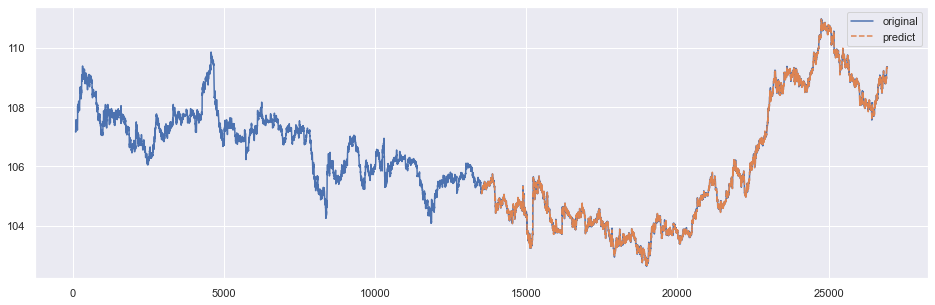

In [16]:
y_ = np.concatenate([np.array([None for i in range(len(y_train)+len(y_val))]) , y_pred])
y_ = pd.DataFrame(y_, index=X.index)

plt.figure(figsize=(16,5))
plt.plot(y, label='original')
plt.plot(y_, '--', label='predict')
plt.legend()

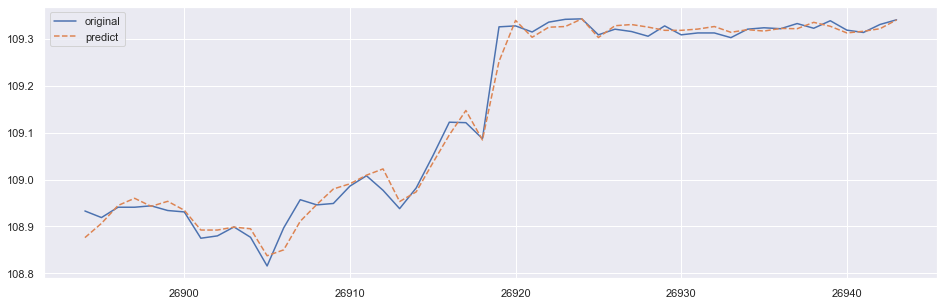

In [17]:
plt.figure(figsize=(16,5))
plt.plot(y[-50:], label='original')
plt.plot(y_[-50:], '--', label='predict')
plt.legend()

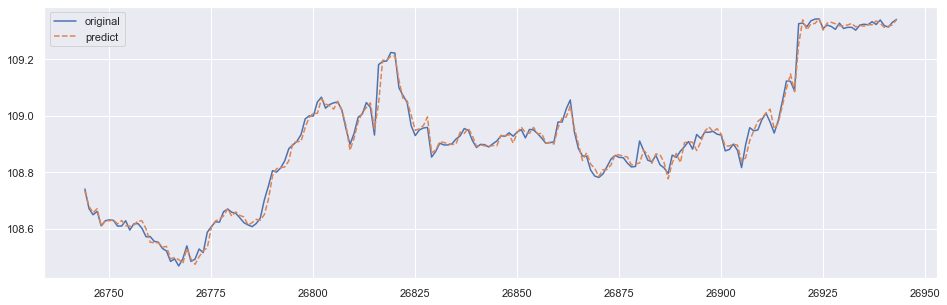

In [18]:
plt.figure(figsize=(16,5))
plt.plot(y[-200:], label='original')
plt.plot(y_[-200:], '--', label='predict')
plt.legend()

In [19]:
import pickle

filename='model.pkl'
pickle.dump(reg_cv_xgb.best_estimator_, open(filename, 'wb'))

In [20]:
X.columns.tolist()

['open',
 'high',
 'low',
 'close',
 'day',
 'month',
 'year',
 'day_of_week',
 'day_of_year',
 'hour',
 'minute',
 'shift1',
 'shift2',
 'shift3',
 'shift4',
 'shift5',
 'shift6',
 'shift7',
 'shift8',
 'shift9',
 'shift10',
 'shift11',
 'shift12',
 'sma5',
 'sma15']

In [21]:
X_test

,open,high,low,close,day,month,year,day_of_week,day_of_year,hour,...,shift5,shift6,shift7,shift8,shift9,shift10,shift11,shift12,sma5,sma15
13522,105.114,105.121,105.107,105.110,14,10,2020,2,288,20,...,105.100,105.083,105.073,105.084,105.059,105.102,105.114,105.201,105.1248,105.121467
13523,105.110,105.136,105.101,105.133,14,10,2020,2,288,20,...,105.115,105.100,105.083,105.073,105.084,105.059,105.102,105.114,105.1238,105.115600
13524,105.133,105.140,105.111,105.120,14,10,2020,2,288,21,...,105.122,105.115,105.100,105.083,105.073,105.084,105.059,105.102,105.1260,105.112200
13525,105.118,105.140,105.118,105.140,14,10,2020,2,288,21,...,105.151,105.122,105.115,105.100,105.083,105.073,105.084,105.059,105.1194,105.106667
13526,105.141,105.149,105.134,105.142,14,10,2020,2,288,21,...,105.122,105.151,105.122,105.115,105.100,105.083,105.073,105.084,105.1232,105.108467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26939,109.321,109.322,109.302,109.314,30,4,2021,4,120,22,...,109.297,109.309,109.300,109.307,109.304,109.302,109.310,109.287,109.3028,109.302267
26940,109.315,109.338,109.282,109.285,30,4,2021,4,120,22,...,109.299,109.297,109.309,109.300,109.307,109.304,109.302,109.310,109.3060,109.301200
26941,109.286,109.318,109.284,109.302,30,4,2021,4,120,23,...,109.278,109.299,109.297,109.309,109.300,109.307,109.304,109.302,109.3076,109.302067
26942,109.302,109.313,109.286,109.311,30,4,2021,4,120,23,...,109.301,109.278,109.299,109.297,109.309,109.300,109.307,109.304,109.3078,109.303067


In [18]:
import pickle

model = pickle.load(open('model.pkl','rb'))

In [21]:
y_pred = model.predict(X_val)
y_pred

array([106.25425 , 106.238335, 106.235725, ..., 105.149734, 105.16245 ,
       105.16034 ], dtype=float32)

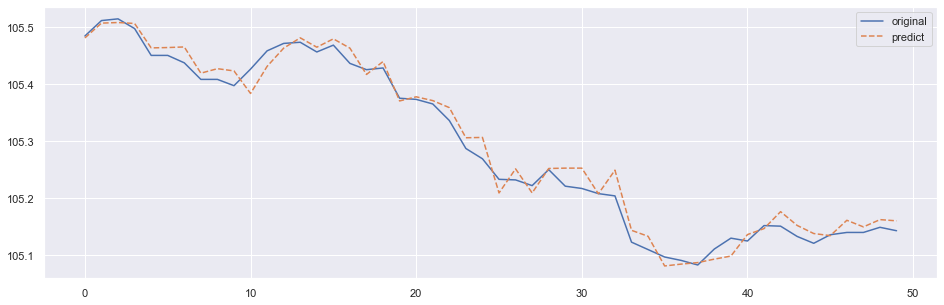

In [32]:
# y_ = np.concatenate([np.array([None for i in range(len(y_train)+len(y_val))]) , y_pred])
# y_ = pd.DataFrame(y_, index=X.index)

plt.figure(figsize=(16,5))
plt.plot(y_val[-50:].reset_index(drop=True), label='original')
plt.plot(y_pred[-50:], '--', label='predict')
plt.legend()

In [30]:
y_val.reset_index(drop=True)

0       106.254
1       106.230
2       106.232
3       106.248
4       106.259
         ...   
2681    105.136
2682    105.140
2683    105.140
2684    105.149
2685    105.143
Name: y, Length: 2686, dtype: float64

In [31]:
y_pred

array([106.25425 , 106.238335, 106.235725, ..., 105.149734, 105.16245 ,
       105.16034 ], dtype=float32)